In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from IPython.display import display

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

Считаем датасет, распечатаем размеры, поля и несколько колонок.

In [2]:
data = pd.read_csv('creditcard.csv', sep=',')
print(data.shape)
print(data.info())
print(data.isna().sum())
data

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Данный датасет содержит информацию о транзакциях с кредитных карт, в частности, о подозрительности активности. Оригинал лежит тут: https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3. К сожалению, " due to confidentiality issues" каггл не дал нормальных признаков, поэтому предсказывать и исследовать придется, опираясь на абстрактные. Из подписанного у нас есть только сумма, фигурирующая в операции, и время, отсчитываемое с первой транзакции. Хорошая же новость состоит в том, что в датасете отсутствуют пропущенные значения. Еще одна хорошая новость заключается в том, что все признаки распознались, как числовые, а значит, проблема в исправлением опечаток, например, в виде букв О вместо нулей тоже отпадает. Вызовем describe, чтобы получить больше представления о структуре признаков.

In [3]:
for column in data.columns:
    #print(column)
    display(data[column].describe())

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64

count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64

count    2.848070e+05
mean     2.074095e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64

count    2.848070e+05
mean     9.604066e-16
std      1.380247e+00
min     -1.137433e+02
25%     -6.915971e-01
50%     -5.433583e-02
75%      6.119264e-01
max      3.480167e+01
Name: V5, dtype: float64

count    2.848070e+05
mean     1.487313e-15
std      1.332271e+00
min     -2.616051e+01
25%     -7.682956e-01
50%     -2.741871e-01
75%      3.985649e-01
max      7.330163e+01
Name: V6, dtype: float64

count    2.848070e+05
mean    -5.556467e-16
std      1.237094e+00
min     -4.355724e+01
25%     -5.540759e-01
50%      4.010308e-02
75%      5.704361e-01
max      1.205895e+02
Name: V7, dtype: float64

count    2.848070e+05
mean     1.213481e-16
std      1.194353e+00
min     -7.321672e+01
25%     -2.086297e-01
50%      2.235804e-02
75%      3.273459e-01
max      2.000721e+01
Name: V8, dtype: float64

count    2.848070e+05
mean    -2.406331e-15
std      1.098632e+00
min     -1.343407e+01
25%     -6.430976e-01
50%     -5.142873e-02
75%      5.971390e-01
max      1.559499e+01
Name: V9, dtype: float64

count    2.848070e+05
mean     2.239053e-15
std      1.088850e+00
min     -2.458826e+01
25%     -5.354257e-01
50%     -9.291738e-02
75%      4.539234e-01
max      2.374514e+01
Name: V10, dtype: float64

count    2.848070e+05
mean     1.673327e-15
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64

count    2.848070e+05
mean    -1.247012e-15
std      9.992014e-01
min     -1.868371e+01
25%     -4.055715e-01
50%      1.400326e-01
75%      6.182380e-01
max      7.848392e+00
Name: V12, dtype: float64

count    2.848070e+05
mean     8.190001e-16
std      9.952742e-01
min     -5.791881e+00
25%     -6.485393e-01
50%     -1.356806e-02
75%      6.625050e-01
max      7.126883e+00
Name: V13, dtype: float64

count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

count    2.848070e+05
mean     4.887456e-15
std      9.153160e-01
min     -4.498945e+00
25%     -5.828843e-01
50%      4.807155e-02
75%      6.488208e-01
max      8.877742e+00
Name: V15, dtype: float64

count    2.848070e+05
mean     1.437716e-15
std      8.762529e-01
min     -1.412985e+01
25%     -4.680368e-01
50%      6.641332e-02
75%      5.232963e-01
max      1.731511e+01
Name: V16, dtype: float64

count    2.848070e+05
mean    -3.772171e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64

count    2.848070e+05
mean     9.564149e-16
std      8.381762e-01
min     -9.498746e+00
25%     -4.988498e-01
50%     -3.636312e-03
75%      5.008067e-01
max      5.041069e+00
Name: V18, dtype: float64

count    2.848070e+05
mean     1.039917e-15
std      8.140405e-01
min     -7.213527e+00
25%     -4.562989e-01
50%      3.734823e-03
75%      4.589494e-01
max      5.591971e+00
Name: V19, dtype: float64

count    2.848070e+05
mean     6.406204e-16
std      7.709250e-01
min     -5.449772e+01
25%     -2.117214e-01
50%     -6.248109e-02
75%      1.330408e-01
max      3.942090e+01
Name: V20, dtype: float64

count    2.848070e+05
mean     1.654067e-16
std      7.345240e-01
min     -3.483038e+01
25%     -2.283949e-01
50%     -2.945017e-02
75%      1.863772e-01
max      2.720284e+01
Name: V21, dtype: float64

count    2.848070e+05
mean    -3.568593e-16
std      7.257016e-01
min     -1.093314e+01
25%     -5.423504e-01
50%      6.781943e-03
75%      5.285536e-01
max      1.050309e+01
Name: V22, dtype: float64

count    2.848070e+05
mean     2.578648e-16
std      6.244603e-01
min     -4.480774e+01
25%     -1.618463e-01
50%     -1.119293e-02
75%      1.476421e-01
max      2.252841e+01
Name: V23, dtype: float64

count    2.848070e+05
mean     4.473266e-15
std      6.056471e-01
min     -2.836627e+00
25%     -3.545861e-01
50%      4.097606e-02
75%      4.395266e-01
max      4.584549e+00
Name: V24, dtype: float64

count    2.848070e+05
mean     5.340915e-16
std      5.212781e-01
min     -1.029540e+01
25%     -3.171451e-01
50%      1.659350e-02
75%      3.507156e-01
max      7.519589e+00
Name: V25, dtype: float64

count    2.848070e+05
mean     1.683437e-15
std      4.822270e-01
min     -2.604551e+00
25%     -3.269839e-01
50%     -5.213911e-02
75%      2.409522e-01
max      3.517346e+00
Name: V26, dtype: float64

count    2.848070e+05
mean    -3.660091e-16
std      4.036325e-01
min     -2.256568e+01
25%     -7.083953e-02
50%      1.342146e-03
75%      9.104512e-02
max      3.161220e+01
Name: V27, dtype: float64

count    2.848070e+05
mean    -1.227390e-16
std      3.300833e-01
min     -1.543008e+01
25%     -5.295979e-02
50%      1.124383e-02
75%      7.827995e-02
max      3.384781e+01
Name: V28, dtype: float64

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [4]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

В принципе, из всего описательного многообразия самым интересным выводом я считаю вывод о том, что данные не нормализованы и не центрированы. Также можно замтеить, что датасет очень не сбалансирован и предсказываемого класса 0 значительно больше, чем 1. В принципе, этих фактов мне пока хватит.

<AxesSubplot:>

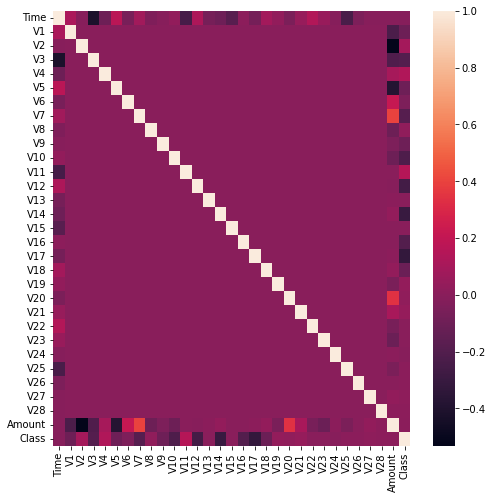

In [5]:
figure = plt.figure(figsize=(8, 8))
corr = data.corr()
sns.heatmap(corr)

Из приведенной хитмапы видно, что признаки вида V# не коррелируют, а это значит, что работа по удалению линейно зависимых признаков и раздумаья, кого из них стоит оставить нам тоже не грозят (мне просто повезло, я не специально выбрал такой халявный дата-сет). Так же видно, что Class не особо зависит от признаков с 19 по 28 и от 13 с 15, так что просто уберем их. Time я тоже уберу, чисто из логических соображений. Тк мошеннические операции вряд ли связаны между собой, вероятность найти какую-то четкую периодичность или зависимость от времени довольно мала + отсутствие зависимости предсказываемого результата от времени так же подтверждается хитмапой. 

In [6]:
data = data.drop(columns=['V13', 'V15'])

In [7]:
data = data.drop(columns=['Time'])

In [8]:
for i in range(19, 29):
    column_name = "V"+str(i)
    data = data.drop(columns=[column_name])
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,10.00,0


Вот теперь наша хитмапа будет без "Бесполезных" признаков.

<AxesSubplot:>

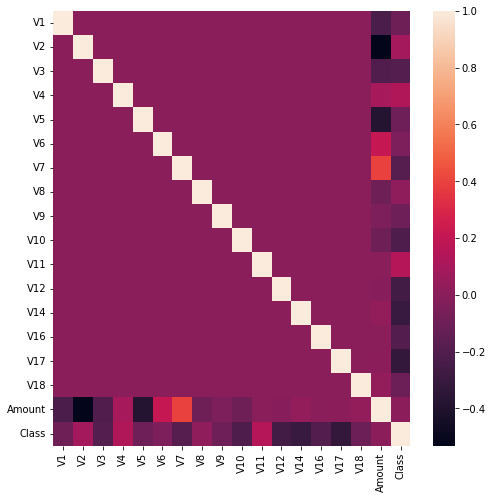

In [9]:
figure = plt.figure(figsize=(8, 8))
corr = data.corr()
sns.heatmap(corr)

Так же я нарисую pairplot, чтобы посмотреть на соотношение существующих "кластеров" в рамках графиков на плоскости. Однако pairplot работает довольно долго, поэтому я выберу по хитмапе 5 признаков, которые, как мне кажется, сильнее все связаны с предсказываемым.

CPU times: user 2min 6s, sys: 5.25 s, total: 2min 12s
Wall time: 2min 5s


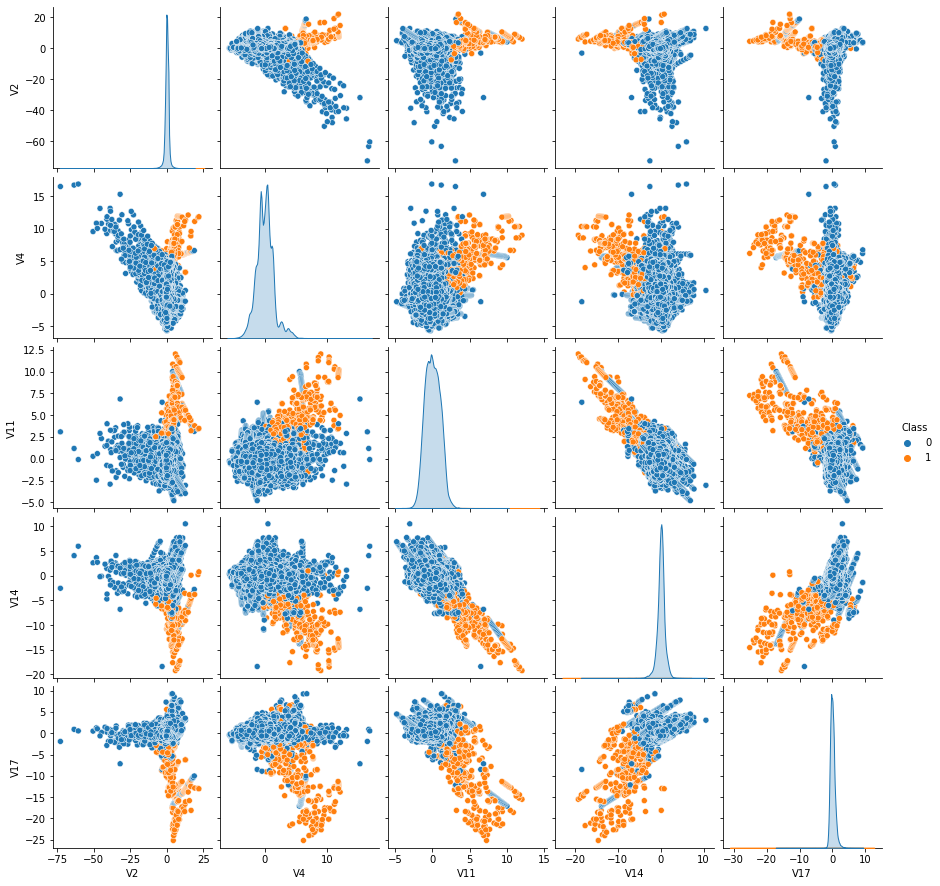

In [10]:
%%time
cols = ['V2', 'V4', 'V11', 'V14', 'V17', 'Class']
sns_plot = sns.pairplot(data[cols], hue="Class")

К моему удивлению, элементы множества класса 1 довольно четко отделимы от множества класса 0, а это значит, что решающее дерево или решающий лес должны неплохо справится с данной задачей классификации.

К сожалению, данных реально много и модели учатся очень долго, что сделает тюнинг болезненным. Я выкину 50% данных, у которых Class=0. Это немного исказит пропорции значений предсказываемого, но не то что бы критически. Их как было меньше процента, так и останется.

In [11]:
data = data.drop(data[data['Class'] == 0].sample(frac=.5, random_state=13).index)

In [12]:
data['Class'].value_counts()

0    142157
1       492
Name: Class, dtype: int64

Так как я собираюсь использовать и KNN, стоит нормализовать данные. Самым простым вариантом является минимакс-нормализация, её и возьмем, но сначала отделим предсказываемый класс от данных для предсказаний.

In [13]:
x = data.drop(columns=['Class'])
y = data['Class']

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.914051,0.655451,0.967846,0.331247,0.767066,0.247516,0.266815,0.718391,0.608674,0.619699,0.252484,0.767777,0.700924,0.434392,0.737173,0.690464,0.005824
1,0.930173,0.678661,0.940026,0.241429,0.775773,0.247162,0.272183,0.663132,0.619773,0.648791,0.248448,0.806420,0.663373,0.446931,0.695620,0.662626,0.001588
2,0.924539,0.661040,0.917428,0.252027,0.787411,0.281188,0.267610,0.729034,0.575332,0.607113,0.243355,0.789338,0.715219,0.442671,0.716608,0.697204,0.003628
3,0.937067,0.674015,0.939455,0.254396,0.772732,0.240190,0.269325,0.717979,0.560127,0.608207,0.345799,0.829578,0.696016,0.472868,0.715411,0.723151,0.000143
4,0.977337,0.638270,0.936972,0.199004,0.756020,0.236239,0.256685,0.717681,0.516733,0.658265,0.356623,0.765497,0.708937,0.450368,0.738493,0.750529,0.000304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142644,0.939238,0.667673,0.927190,0.242812,0.771008,0.228858,0.271017,0.714078,0.597313,0.610270,0.248834,0.791200,0.721285,0.441545,0.726049,0.623991,0.000214
142645,0.949635,0.670304,0.907482,0.311211,0.768319,0.232260,0.267958,0.718711,0.580025,0.614615,0.219324,0.774771,0.754090,0.403815,0.758423,0.688423,0.000936
142646,0.904693,0.656518,0.942222,0.280966,0.777444,0.299764,0.256107,0.746429,0.643776,0.602497,0.210117,0.813310,0.680621,0.428851,0.744123,0.716774,0.003114
142647,0.990641,0.653856,0.896808,0.276331,0.769295,0.235233,0.265459,0.715323,0.611834,0.624143,0.316405,0.817791,0.735681,0.456519,0.713544,0.676775,0.000104


Теперь к самим моделям. Начнем с KNN. Используем параметр stratify для сохранения пропорций в выборках.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,stratify=y, test_size=0.3, random_state=13)

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Простейший knn классификатор обучен, осталось только проверить, насколько хорошо. Обычная точность не подойдет, потому что датасет очень несбалансированный. Для оценки точности я буду использовать recall и precision. При противоречивых результатах я буду отдавать предпочтение recall'у, тк пропустить мошенника хуже, чем перепроверить честную транзакцию.

In [17]:
%%time
knn_pred = knn.predict(x_test)

CPU times: user 2min 8s, sys: 2min 9s, total: 4min 17s
Wall time: 1min 16s


In [18]:
from sklearn.metrics import recall_score, precision_score
prec = precision_score(y_test, knn_pred)
rec = recall_score(y_test, knn_pred)
print("Precision = ", prec)
print("Recall = ", rec)

Precision =  0.946969696969697
Recall =  0.8445945945945946


К моему удивлению, результаты в первом приближении оказались достаточно неплохие, не смотря на случайность выбранного числа соседей. Теперь попробуем подобрать параметры и начнем подбор именно с количества соседей.

In [19]:
%%time
rec_list = []
prec_list = []
nn = []
for i in range(1,11):
    nn.append(i*10)

for i in nn:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    
    prec = precision_score(y_test, knn_pred)
    rec = recall_score(y_test, knn_pred)
    
    rec_list.append(rec)
    prec_list.append(prec)

CPU times: user 22min 5s, sys: 21min 8s, total: 43min 13s
Wall time: 12min 56s


Best recall =  0.8445945945945946  on  10  neighbours


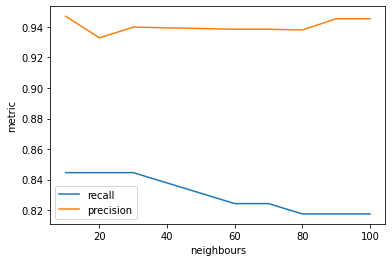

In [20]:
ind = 0
for i in range(0, 10):
    if rec_list[i] > rec_list[ind]:
        ind = i
        
print("Best recall = ", rec_list[ind], " on ", (ind + 1) * 10, " neighbours")


plt.plot(nn, rec_list, label='recall')
plt.plot(nn, prec_list, label='precision')
plt.xlabel('neighbours')
plt.ylabel('metric')
plt.legend()
plt.show()

Из графиков видно, что оптимальное количество соседей близко к 10. После него recall начинает падать, а precision не превышает результатов, достигнутых при 10. Теперь переберем соседей в окрестности 10. 

In [21]:
%%time
rec_list = []
prec_list = []
nn = []
for i in range(1,16):
    nn.append(i)

for i in nn:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    
    prec = precision_score(y_test, knn_pred)
    rec = recall_score(y_test, knn_pred)
    
    rec_list.append(rec)
    prec_list.append(prec)

CPU times: user 33min 11s, sys: 33min 15s, total: 1h 6min 26s
Wall time: 17min 33s


Best recall =  0.8513513513513513  on  5  neighbours


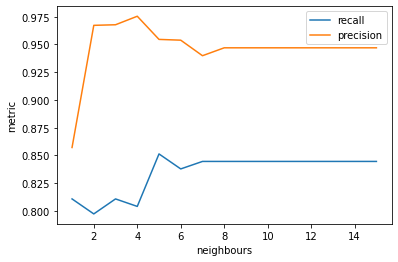

In [23]:
ind = 0
for i in range(len(rec_list)):
    if rec_list[i] > rec_list[ind]:
        ind = i
        
print("Best recall = ", rec_list[ind], " on ", nn[ind], " neighbours")


plt.plot(nn, rec_list, label='recall')
plt.plot(nn, prec_list, label='precision')
plt.xlabel('neighbours')
plt.ylabel('metric')
plt.legend()
plt.show()

Из графиков видно, что оптимальное количество соседей в нашей ситуации - 5. Лучший recall + не самый худший precision.

In [24]:
%%time
dist_list = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
rec_list = []
prec_list = []

for dist in dist_list:
    knn = KNeighborsClassifier(n_neighbors=5, metric=dist)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    
    prec = precision_score(y_test, knn_pred)
    rec = recall_score(y_test, knn_pred)
    
    rec_list.append(rec)
    prec_list.append(prec)

CPU times: user 6min 31s, sys: 4min 36s, total: 11min 7s
Wall time: 4min 54s


In [25]:
ind = 0
for i in range(len(rec_list)):
    if rec_list[i] > rec_list[ind]:
        ind = i
        
print("Best recall = ", rec_list[ind], " on ", dist_list[ind], " metric")
print("Precision for this metric = ", prec_list[ind])

Best recall =  0.8513513513513513  on  euclidean  metric
Precision for this metric =  0.9545454545454546


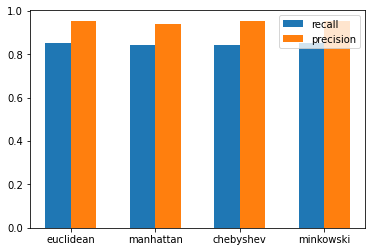

In [26]:
width = 0.3
x = np.arange(len(dist_list))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rec_list, width, label='recall')
rects2 = ax.bar(x + width/2, prec_list, width, label='precision')
ax.set_xticks(x)
ax.set_xticklabels(dist_list)
ax.legend()

Таким образом, лучшая метрика для расстояния - Евклидово расстояние. Осталось только проверить, поможет ли использование расстояний в вычислениях.

In [28]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
    
prec = precision_score(y_test, knn_pred)
rec = recall_score(y_test, knn_pred)
    
print("Weights recall = ", rec)
print("Weights precision = ", prec)

Weights recall =  0.8513513513513513
Weights precision =  0.9618320610687023


Precision чуть-чуть вырос, так что можно оставить этот параметр. На этом тюнинг knn предлагается прекратить и вывести итоговые показатели лучшего из того, что у меня получилось. По большому счету, получилось не так уж и плохо, всего 15% мошенников могут ускользнуть от такой примитивной модели в то время, как только 4% порядочных граждан столкнуться с необходимостью подтвердить транзакцию лишний раз.

Перейдем к решающему дереву. Алгоритм невосприимчив к нормализации, поэтому можно использовать данные без предобработки.

In [29]:
%%time
x = data.drop(columns=['Class'])
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, test_size=0.3, random_state=13)

tree = DecisionTreeClassifier(max_depth=13, random_state=13)
tree.fit(x_train, y_train)

CPU times: user 2.15 s, sys: 49.6 ms, total: 2.2 s
Wall time: 2.2 s


DecisionTreeClassifier(max_depth=13, random_state=13)

In [30]:
%%time
tree_pred = tree.predict(x_test)

CPU times: user 2.67 ms, sys: 2.42 ms, total: 5.09 ms
Wall time: 3.75 ms


In [31]:
prec = precision_score(y_test, tree_pred)
rec = recall_score(y_test, tree_pred)
print("Precision = ", prec)
print("Recall = ", rec)

Precision =  0.8055555555555556
Recall =  0.7837837837837838


Заметно менее удачный старт. Начнем тюнинг с перебора максимальной глубины.

In [32]:
%%time
rec_list = []
prec_list = []
md = []
for i in range(1,21):
    md.append(i*10)

for i in md:
    tree = DecisionTreeClassifier(max_depth=i, random_state=13)
    tree.fit(x_train, y_train)
    tree_pred = tree.predict(x_test)
    
    prec = precision_score(y_test, tree_pred)
    rec = recall_score(y_test, tree_pred)
    
    rec_list.append(rec)
    prec_list.append(prec)

CPU times: user 43.3 s, sys: 954 ms, total: 44.3 s
Wall time: 44.3 s


Best recall =  0.7905405405405406  with  20  max depth


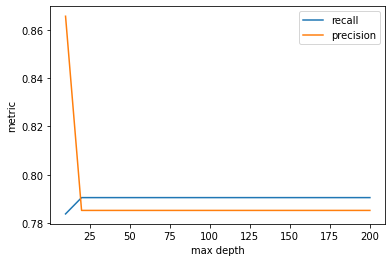

In [33]:
ind = 0
for i in range(len(rec_list)):
    if rec_list[i] > rec_list[ind]:
        ind = i
        
print("Best recall = ", rec_list[ind], " with ", md[ind], " max depth")


plt.plot(md, rec_list, label='recall')
plt.plot(md, prec_list, label='precision')
plt.xlabel('max depth')
plt.ylabel('metric')
plt.legend()
plt.show()

Из графиков видно, что после 20 дерево уже не обучается до своей максимальной глубины и показывает одинаковые результаты, поэтому переберем все значения для глубины от 1 до 20

In [34]:
%%time
rec_list = []
prec_list = []
md = []
for i in range(1,21):
    md.append(i)

for i in md:
    tree = DecisionTreeClassifier(max_depth=i, random_state=13)
    tree.fit(x_train, y_train)
    tree_pred = tree.predict(x_test)
    
    prec = precision_score(y_test, tree_pred)
    rec = recall_score(y_test, tree_pred)
    
    rec_list.append(rec)
    prec_list.append(prec)

CPU times: user 32.3 s, sys: 702 ms, total: 33 s
Wall time: 33 s


Best recall =  0.831081081081081  with  4  max depth


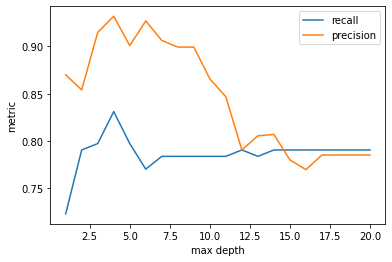

In [35]:
ind = 0
for i in range(len(rec_list)):
    if rec_list[i] > rec_list[ind]:
        ind = i
        
print("Best recall = ", rec_list[ind], " with ", md[ind], " max depth")


plt.plot(md, rec_list, label='recall')
plt.plot(md, prec_list, label='precision')
plt.xlabel('max depth')
plt.ylabel('metric')
plt.legend()
plt.show()

Из графиков видно, что максимальная глубина 4 оптимальна и по recall, и по precision.

Далее переберем min_samples_leaf - минимальное количество примеров выборки для формирования листа. Это сделает модель погрубее, но и риск потенциального переобучения понизит, а значит, теоритически, может нам помочь.

In [36]:
%%time
rec_list = []
prec_list = []
md = []
for i in range(1,21):
    md.append(i)

for i in md:
    tree = DecisionTreeClassifier(max_depth=4, random_state=13, min_samples_leaf=i)
    tree.fit(x_train, y_train)
    tree_pred = tree.predict(x_test)
    
    prec = precision_score(y_test, tree_pred)
    rec = recall_score(y_test, tree_pred)
    
    rec_list.append(rec)
    prec_list.append(prec)

CPU times: user 15.9 s, sys: 344 ms, total: 16.3 s
Wall time: 16.3 s


Best recall =  0.8378378378378378  with  3  minimum samples leaf requires


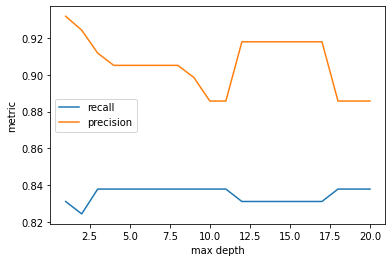

In [37]:
ind = 0
for i in range(len(rec_list)):
    if rec_list[i] > rec_list[ind]:
        ind = i
        
print("Best recall = ", rec_list[ind], " with ", md[ind], " minimum samples leaf requires")


plt.plot(md, rec_list, label='recall')
plt.plot(md, prec_list, label='precision')
plt.xlabel('max depth')
plt.ylabel('metric')
plt.legend()
plt.show()

Выберем 3 в качестве оптимального по recall'у значения и продолжим тюнинг с min_samples_split, отвечающим за минимальный размер листа, с которого его можно разбивать.

In [39]:
%%time
rec_list = []
prec_list = []
md = []
for i in range(2,21):
    md.append(i)

for i in md:
    tree = DecisionTreeClassifier(max_depth=4, random_state=13, min_samples_leaf=3, min_samples_split=i)
    tree.fit(x_train, y_train)
    tree_pred = tree.predict(x_test)
    
    prec = precision_score(y_test, tree_pred)
    rec = recall_score(y_test, tree_pred)
    
    rec_list.append(rec)
    prec_list.append(prec)

CPU times: user 15.3 s, sys: 326 ms, total: 15.6 s
Wall time: 15.6 s


Best recall =  0.8378378378378378  with  2  minimum samples split requires
Precision =  0.9117647058823529  with  2  minimum samples split requires


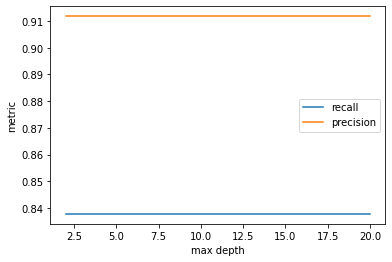

In [40]:
ind = 0
for i in range(len(rec_list)):
    if rec_list[i] > rec_list[ind]:
        ind = i
        
print("Best recall = ", rec_list[ind], " with ", md[ind], " minimum samples split requires")
print("Precision = ", prec_list[ind], " with ", md[ind], " minimum samples split requires")

plt.plot(md, rec_list, label='recall')
plt.plot(md, prec_list, label='precision')
plt.xlabel('max depth')
plt.ylabel('metric')
plt.legend()
plt.show()

Тюнинг этого параметра ничего не дал, так что оставим его по умолчанию. Попробуем поменять параметр criterion на entropy, чтобы поменять критерий оптимального разбиения.

In [41]:
tree = DecisionTreeClassifier(max_depth=4, random_state=13, min_samples_leaf=3, criterion='entropy')
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
    
prec = precision_score(y_test, tree_pred)
rec = recall_score(y_test, tree_pred)

print('Entropy recall = ', rec)
print('Entropy precision = ', prec)

Entropy recall =  0.8445945945945946
Entropy precision =  0.9191176470588235


Это изменение дает нам еще чуть менее процента к recall. Можно и принебречь подобными изменениями, тк они получслучайны, но формально результат улучшился, так что оставим.

Попробуем подключить взвешивание классов через class_weight. Это потенциально может довольно сильно улучшить модель, так как мы работаем с крайне несбалансированным датасетом

In [42]:
tree = DecisionTreeClassifier(max_depth=4, random_state=13, min_samples_leaf=3, criterion='entropy', class_weight='balanced')
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
    
prec = precision_score(y_test, tree_pred)
rec = recall_score(y_test, tree_pred)

print('Balanced recall = ', rec)
print('Balanced precision = ', prec)

Balanced recall =  0.8918918918918919
Balanced precision =  0.24444444444444444


Recall вырос, но precision упал очень сильно. Модель стала слишком "подозрительной" и съедает много немошеннических транзакций. Как итог, лучшими результатами для дерева решений являются recall= 0.8445945945945946 и precision=0.9191176470588235. KNN показал лучшие результаты (recall=0.8513513513513513, precision=0.9618320610687023), но принципиальной разницы по recall все-таки не наблюдается. Обе модели обучились неплохо, но и не феноменально хорошо. Возможно, при большем количестве мошеннических транзакций в базе точность удалось бы повысить, но имеем, что имеем.